In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print('x_train : ',x_train.shape)
print('x_test : ',x_test.shape)

K = len(np.unique(y_train))    # classes
print('Number of classes :', K)

x_train :  (50000, 32, 32, 3)
x_test :  (10000, 32, 32, 3)
Number of classes : 10


In [4]:
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = x_train.shape[1]*x_train.shape[1]*3

print('Number of train samples :', Ntr)
print('Number of test samples :', Nte)
print('Dimension of each sample :', Din)

Number of train samples : 50000
Number of test samples : 10000
Dimension of each sample : 3072


In [5]:
labels = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog',
         7:'horse', 8:'ship', 9:'truck'}

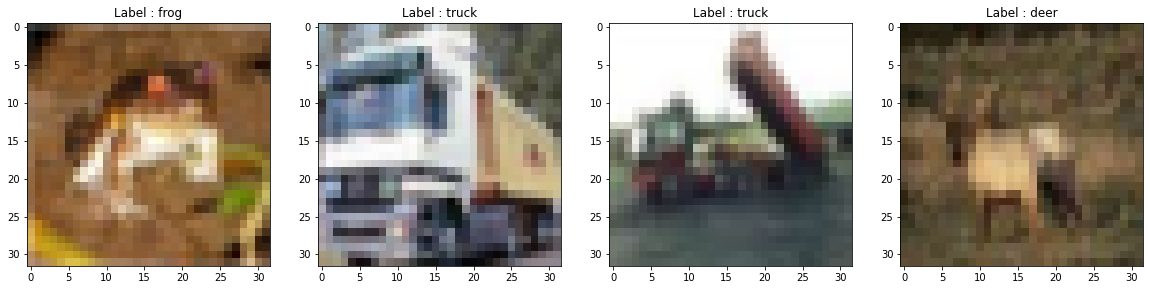

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(20,20))

for i in range(0, 4):
    img = x_train[i]
    ax.ravel()[i].imshow(img)
    ax.ravel()[i].set_title("Label : {}".format(labels.get(y_train[i][0])))

In [7]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

mean_image = np.mean(x_train, axis=0)

x_train = x_train - mean_image
x_test = x_test - mean_image

In [8]:
# like one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

print('Shape after one hot encoding :',y_train.shape)

Shape after one hot encoding : (50000, 10)


In [9]:
x_train = np.reshape(x_train,(Ntr,Din))   #flattening
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('Shape of x_train after reshaping :', x_train.shape)

Shape of x_train after reshaping : (50000, 3072)


In [10]:
# initializing weight and bias vectors

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
batch_size = Ntr

print("w1:", w1.shape)
print("b1:", b1.shape)
print('Batch size :', Ntr)

w1: (3072, 10)
b1: (10,)
Batch size : 50000


In [11]:
# Bias Trick 
# Simplifies two parameters W,b into a one matrix. This way our model only has to learn one weight matrix instead of two separate matrices.
# We combine W and b into a single matrix and also add an extra column that always hold 1.

W = np.append(w1, b1.reshape(1, K), axis=0)
print('New weight matrix shape: ',W.shape)

x_train_new = np.append(x_train, np.ones((x_train.shape[0], 1)), axis=1)
x_test_new = np.append(x_test, np.ones((x_test.shape[0], 1)), axis=1)

print('Rearranged x_train: ', x_train_new.shape)

New weight matrix shape:  (3073, 10)
Rearranged x_train:  (50000, 3073)


# **Gradient Descent**

In [12]:
iterations = 300   # epoches
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6
lr_history = []
loss_history = []  
train_acc_history = [] 
val_acc_history = [] 
val_loss_history = []

m = x_train.shape[0] 

print("Running gradient descent...")

for t in range(1, iterations+1):    
  # Forward Pass
  scores = x_train_new.dot(W)
  error = scores - y_train

  loss_func = (1/(2*m))*np.sum((error)**2) + (reg/(2*m))*np.sum(W**2)
  loss_history.append(loss_func)
    
  # Backward Pass
  W = W - lr*((1/m)*(x_train_new.T.dot(error))  + (1/m)*reg*W )
    
  # get accuracies
  # to get the array of classes with highest score (column with highest value along a row), we use argmax
  pred_class = np.argmax(scores, axis=1)
  true_class = np.argmax(y_train, axis=1)    # we use the argmax function here because now y_train is a 5000x10 array after one hot encoding

  # Train set
  correct_pred = np.sum([pred_class == true_class])
  train_acc = (correct_pred/m)*100
  train_acc_history.append(train_acc)

  # Test set
  pred_class_test = np.argmax(x_test_new.dot(W), axis=1)
  true_class_test = np.argmax(y_test, axis=1)

  val_loss = 1/(x_test_new.shape[0]*2)*np.sum((x_test_new.dot(W)-y_test)**2)
  val_loss_history.append(val_loss)

  correct_pred_test = np.sum([pred_class_test == true_class_test])
  val_acc = (correct_pred_test/x_test_new.shape[0])*100
  val_acc_history.append(val_acc)
    
  # Training details
  if t == 1 or t%10 == 0:
    print("| Epoch {:04} | Loss {:.4f} | Training Acc: {:.4f} | Validation Acc: {:.4f} | Learning Rate: {:.4f} |".format(t,loss_func,train_acc,val_acc,lr))
    
  # Learning rate decay
  lr_history.append(lr)
  lr = lr*lr_decay
    
print("Gradient Descent - Done")

Running gradient descent...
| Epoch 0001 | Loss 0.5000 | Training Acc: 9.5060 | Validation Acc: 24.8700 | Learning Rate: 0.0140 |
| Epoch 0010 | Loss 0.4556 | Training Acc: 32.2520 | Validation Acc: 32.7700 | Learning Rate: 0.0139 |
| Epoch 0020 | Loss 0.4399 | Training Acc: 35.1500 | Validation Acc: 35.0400 | Learning Rate: 0.0137 |
| Epoch 0030 | Loss 0.4297 | Training Acc: 36.4820 | Validation Acc: 36.3900 | Learning Rate: 0.0136 |
| Epoch 0040 | Loss 0.4223 | Training Acc: 37.1480 | Validation Acc: 37.3200 | Learning Rate: 0.0135 |
| Epoch 0050 | Loss 0.4168 | Training Acc: 37.6600 | Validation Acc: 37.7800 | Learning Rate: 0.0133 |
| Epoch 0060 | Loss 0.4126 | Training Acc: 38.1000 | Validation Acc: 38.1700 | Learning Rate: 0.0132 |
| Epoch 0070 | Loss 0.4094 | Training Acc: 38.4560 | Validation Acc: 38.4400 | Learning Rate: 0.0131 |
| Epoch 0080 | Loss 0.4069 | Training Acc: 38.7640 | Validation Acc: 38.7200 | Learning Rate: 0.0129 |
| Epoch 0090 | Loss 0.4049 | Training Acc: 38.

## **Plotting W as images**

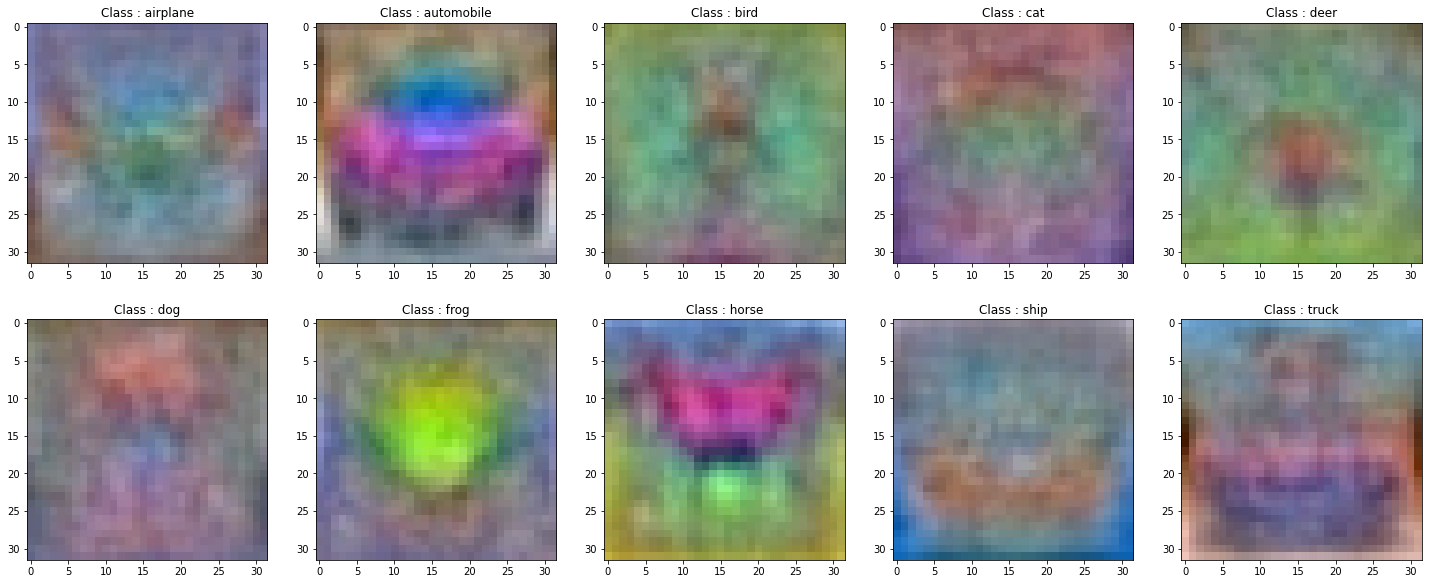

In [13]:
W_orig = W[:-1]
W_img =  W_orig - np.min(W_orig)   # removing negative weights
images = ((W_img/np.max(W_img))*255).astype('uint8')

classes = list(labels.values())

fig, ax  = plt.subplots(2,5, figsize=(25,10))
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    ax.ravel()[i].imshow(image)
    ax.ravel()[i].set_title("Class : {}".format(classes[i]))
    #plt.tight_layout()

## **Plotting learning rate and accuracy curves**

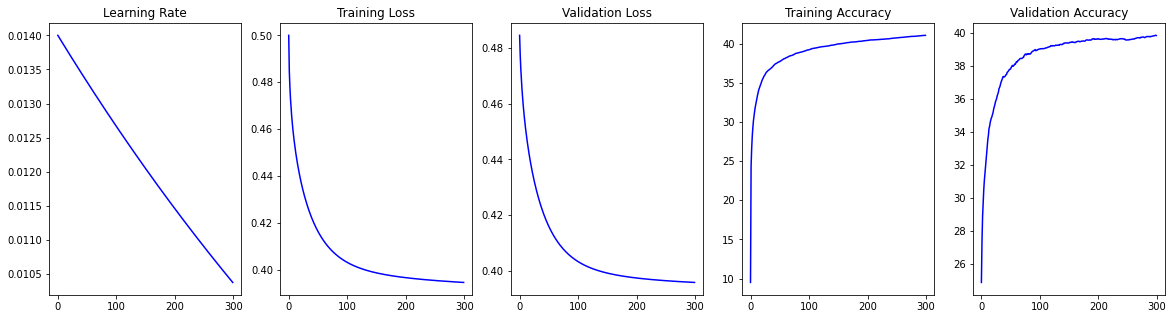

In [14]:
fig, ax  = plt.subplots(1,5, figsize=(20,5))
items = {"Learning Rate":lr_history, "Training Loss":loss_history, "Validation Loss":val_loss_history, "Training Accuracy":train_acc_history, 
         "Validation Accuracy": val_acc_history}
i=1
for key in items.keys():
    plt.subplot(1,5,i);
    plt.plot(items[key], color ='b')
    plt.title(key)
    i+=1